## Challenge

Do a little scraping or API-calling of your own.  Pick a new website and see what you can get out of it.  Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.  

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)  
2) Iterate over multiple pages/queries  
3) Save the data to your computer  

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.  Write up a report from scraping code to summary and share it with your mentor.

In [1]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess


class CLSpider(scrapy.Spider):
    
    name = "CL"
    
    # URL(s) to start with.
    start_urls = [
        'https://sfbay.craigslist.org/search/sss?query=wilson%20blade&sort=rel',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//p'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                'title': posting.xpath('a[@class="result-title hdrlnk"]/text()').extract_first(),
                'date': posting.xpath('time[@class="result-date"]/text()').extract_first(),
                'price': posting.xpath('span/span[@class="result-price"]/text()').extract_first()
            }
        next_page = response.xpath('//div/div/span[@class="buttons"]/a[3][@href]').extract_first()
        
        pagenum = int(re.findall(r'\d+',next_page)[0])
        
        if next_page is not None and pagenum < 10:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse)

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'CLdata.json',  # Name our storage file.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcamp_Kevin (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(CLSpider)
process.start()
print('Success!')

Success!


In [2]:
import pandas as pd

# Turning JSON into Data Frame
rackets = pd.read_json('CLdata.json')
print(rackets.shape)
rackets.head()

(27, 3)


,title,date,price
0,Wilson Blade 98 18x20 v7 4 3/8,Nov 2,$200
1,Wilson BLX Blade Tour New,Nov 1,$85
2,Wilson BLX Blade 98 Black/Green 18x20 Tennis R...,Oct 31,$105
3,Wilson BLX Blade 98 Tennis Racquet,Oct 31,$95
4,Wilson BLX Blade 98 Tennis Racquet,Oct 31,$95


In [4]:
# Check data types
rackets.dtypes

title    object
date     object
price     int64
dtype: object

In [5]:
rackets = rackets.dropna()

In [6]:
average_price = rackets.price.mean()

print(average_price)

150.96296296296296


The average price is 151 dollars but according to the top results, the frames aren't that expensive.

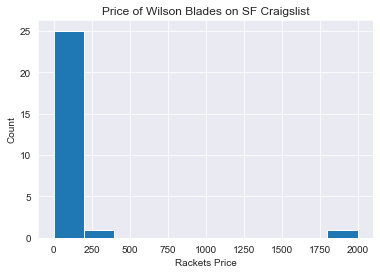

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

plt.hist(rackets.price, bins=10)
plt.xlabel('Rackets Price')
plt.ylabel('Count')
plt.title('Price of Wilson Blades on SF Craigslist')
plt.show()

There are one rackets where it sells for more than 1750 dollars. That's why the average is so much higher. The median is probably around 100.